In [31]:
import os,sys
sys.argv.append("-b")
import ROOT as rt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
training_output_file_name='/home/ecohen/UBImageNetTune/nohup.out'
ntraining =  100232
nevents_per_iteration = 8

In [7]:
iters_per_point = 20
test_iters_per_point = 100
nevents_per_epoch = float(ntraining)/float(nevents_per_iteration)
f = open(training_output_file_name,'r')
out = rt.TFile("plots_training.root", "recreate")

In [8]:
loss_pts = []
acc_pts = []
train_acc_pts = []
niter = 0
niter_test = 0
niter_trainacc = 0
loss_max = 0

In [9]:
for l in f:
    if "solver.cpp:244" in l and "Train net output #1: loss3/loss3" in l:
        # TRAINING LOSS
        loss = float( l.strip().split("=")[1].split("(")[0].strip() )
        loss_pts.append( (niter,loss) )
        niter += iters_per_point
        if loss_max<loss:
            loss_max = loss
    elif "Test net output #2: loss3/top-1" in l:
        # VAL ACC
        acc = float( l.strip().split("=")[1] )
        acc_pts.append( (niter_test,acc) )
        niter_test += test_iters_per_point
    elif "Train net output #2: loss3/top-1" in l:
        # TRAIN ACC
        train_acc = float( l.strip().split("=")[1] )
        train_acc_pts.append( (niter_trainacc, train_acc ) )
        niter_trainacc += iters_per_point

In [10]:
gloss = rt.TGraph( len(loss_pts) )
for n,pt in enumerate(loss_pts):
    gloss.SetPoint(n, float(pt[0])/nevents_per_epoch, pt[1])

gacc = rt.TGraph( len(acc_pts) )
for n,pt in enumerate(acc_pts):
    gacc.SetPoint(n,float(pt[0])/nevents_per_epoch, pt[1])

gacc_train = rt.TGraph( len(train_acc_pts) )
for n,pt in enumerate(train_acc_pts):
    gacc_train.SetPoint(n,float(pt[0])/nevents_per_epoch, pt[1])

In [11]:
gloss.Write("gloss")
gacc.Write("gacc_test")
gacc_train.Write("gacc_train")

1823

In [34]:
x_ratio_to_nevents_per_epoch_loss_pts = []
y_ratio_to_nevents_per_epoch_loss_pts = []
for n,pt in enumerate(loss_pts):
    x_ratio_to_nevents_per_epoch_loss_pts.append(pt[1])
    y_ratio_to_nevents_per_epoch_loss_pts.append(float(pt[0])/nevents_per_epoch)
    
x_ratio_to_nevents_per_epoch_train_acc_pts = []
y_ratio_to_nevents_per_epoch_train_acc_pts = []
for n,pt in enumerate(train_acc_pts):
    x_ratio_to_nevents_per_epoch_train_acc_pts.append(pt[1])
    y_ratio_to_nevents_per_epoch_train_acc_pts.append(float(pt[0])/nevents_per_epoch)

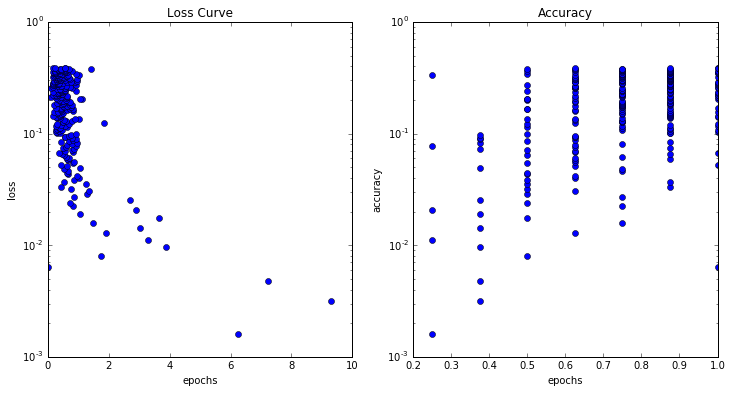

In [43]:
fig = plt.figure(figsize=(12,6))    
ax = fig.add_subplot(1,2,1)
plt.plot(x_ratio_to_nevents_per_epoch_loss_pts,y_ratio_to_nevents_per_epoch_loss_pts,marker='o',linestyle='none')
ax.set_yscale('log')
plt.title('Loss Curve')
plt.xlabel('epochs')
plt.ylabel('loss')

ax = fig.add_subplot(1,2,2)
plt.plot(x_ratio_to_nevents_per_epoch_train_acc_pts,y_ratio_to_nevents_per_epoch_train_acc_pts,marker='o',linestyle='none')
ax.set_yscale('log')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')